<a href="https://colab.research.google.com/github/saurabhmungale/DataScience_Assignements/blob/main/Neural_Network_A_Simple_Perception_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Que.1) How do you create a simple perceptron for basic binary classification!

In [1]:
import numpy as np

# Step 1: Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        # Initialize weights and bias
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate

    # Activation function (step function)
    def step_function(self, x):
        return 1 if x >= 0 else 0

    # Predict function (calculate weighted sum and apply activation)
    def predict(self, X):
        weighted_sum = np.dot(X, self.weights) + self.bias
        return self.step_function(weighted_sum)

    # Training function (Perceptron Learning Rule)
    def train(self, X, y, epochs=100):
        for epoch in range(epochs):
            for i in range(len(X)):
                # Get prediction
                prediction = self.predict(X[i])
                # Update weights and bias if there's an error
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

# Step 2: Example Dataset for binary classification (AND operation)
# Inputs (X) and Labels (y) for the AND operation
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
y = np.array([0, 0, 0, 1])  # Target labels (AND output)

# Step 3: Initialize Perceptron and Train
perceptron = Perceptron(input_size=2)
perceptron.train(X, y, epochs=10)

# Step 4: Test the perceptron
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {perceptron.predict(X[i])}, Actual: {y[i]}")


Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 0, Actual: 0
Input: [1 0], Predicted: 0, Actual: 0
Input: [1 1], Predicted: 1, Actual: 1


Que.2)How can you build a neural network with one hidden layer using Keras!

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

# Step 1: Load and prepare the data (Iris dataset for example)
data = load_iris()
X = data.data  # Features (4 features)
y = data.target  # Labels (3 classes)

# Convert labels to binary for simplicity (e.g., class 0 vs classes 1 and 2)
y = np.where(y == 0, 0, 1)  # Binary classification: Class 0 vs Class 1 or 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the Neural Network model
model = Sequential()

# Input layer (number of features = 4) and the hidden layer with 10 neurons
model.add(Dense(10, input_dim=4, activation='relu'))  # One hidden layer with 10 neurons

# Output layer (binary classification with 1 neuron)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Step 3: Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Step 6: Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary values
print("Predictions:", predictions)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3800 - loss: 1.6952 - val_accuracy: 0.3333 - val_loss: 1.6421
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3220 - loss: 1.5534 - val_accuracy: 0.3333 - val_loss: 1.3743
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2946 - loss: 1.3817 - val_accuracy: 0.3333 - val_loss: 1.1370
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3432 - loss: 1.0584 - val_accuracy: 0.3333 - val_loss: 0.9404
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3710 - loss: 0.8499 - val_accuracy: 0.3333 - val_loss: 0.7783
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3277 - loss: 0.7452 - val_accuracy: 0.4000 - val_loss: 0.6492
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3360 - loss: 0.6647 - val_accuracy: 0.5667 - val_loss: 0.5519
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7084 - loss: 0.5344 - val_accuracy: 0.9000 - val_loss: 0.

Que.3)How do you initialize weights using the Xavier (Glorot) initialization method in Keras!

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load and prepare the data (Iris dataset for example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Convert labels to binary for simplicity (e.g., class 0 vs classes 1 and 2)
y = (y == 0).astype(int)  # Convert to binary classification: Class 0 vs Class 1 or 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add a hidden layer with Xavier initialization
model.add(Dense(10, input_dim=4, activation='relu', kernel_initializer=GlorotUniform()))  # GlorotUniform initialization

# Output layer
model.add(Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform()))  # Xavier initialization for output layer

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6705 - loss: 0.7676 - val_accuracy: 0.6667 - val_loss: 0.7043
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6709 - loss: 0.6946 - val_accuracy: 0.6667 - val_loss: 0.6344
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6604 - loss: 0.6384 - val_accuracy: 0.6667 - val_loss: 0.5759
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6480 - loss: 0.6008 - val_accuracy: 0.6667 - val_loss: 0.5285
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7016 - loss: 0.5001 - val_accuracy: 0.6667 - val_loss: 0.4975
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6728 - loss: 0.5051 - val_accuracy: 0.6667 - val_loss: 0.4724
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6867 - loss: 0.4600 - val_accuracy: 0.6667 - val_loss: 0.4541
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6716 - loss: 0.4626 - val_accuracy: 0.6667 - 

QUe.4)How can you apply different activation functions in a neural network in Keras!

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load and prepare the data (Iris dataset for example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Convert labels to binary for simplicity (e.g., class 0 vs classes 1 and 2)
y = (y == 0).astype(int)  # Binary classification: Class 0 vs Class 1 or 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add layers with different activation functions
model.add(Dense(10, input_dim=4, activation='relu'))  # ReLU for hidden layer
model.add(Dense(10, activation='tanh'))  # Tanh for another hidden layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for output layer (binary classification)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6828 - loss: 0.6817 - val_accuracy: 0.6667 - val_loss: 0.6581
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6356 - loss: 0.6642 - val_accuracy: 0.6667 - val_loss: 0.6164
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7102 - loss: 0.5859 - val_accuracy: 0.6667 - val_loss: 0.5649
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7413 - loss: 0.5229 - val_accuracy: 0.7000 - val_loss: 0.5034
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8992 - loss: 0.5113 - val_accuracy: 1.0000 - val_loss: 0.4431
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.4390 - val_accuracy: 1.0000 - val_loss: 0.3961
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3898 - val_accuracy: 1.0000 - val_loss: 0.3561
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.3434 - val_accuracy: 1.0000 - 

Que.5)How do you add dropout to a neural network model to prevent overfitting!

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load and prepare the data (Iris dataset for example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Convert labels to binary for simplicity (e.g., class 0 vs classes 1 and 2)
y = (y == 0).astype(int)  # Binary classification: Class 0 vs Class 1 or 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add a hidden layer with ReLU activation and dropout
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate

# Add another hidden layer with ReLU activation and dropout
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate

# Output layer with Sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2861 - loss: 0.9545 - val_accuracy: 0.0000e+00 - val_loss: 0.7834
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3855 - loss: 0.8207 - val_accuracy: 0.3667 - val_loss: 0.7139
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4609 - loss: 0.7758 - val_accuracy: 0.6667 - val_loss: 0.6534
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5220 - loss: 0.7275 - val_accuracy: 0.6667 - val_loss: 0.6119
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6276 - loss: 0.6257 - val_accuracy: 0.6667 - val_loss: 0.5825
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7371 - loss: 0.5945 - val_accuracy: 0.9000 - val_loss: 0.5538
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6948 - loss: 0.6071 - val_accuracy: 1.0000 - val_loss: 0.5244
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8266 - loss: 0.5262 - val_accuracy: 1.000

Que.6)How do you manually implement forward propagation in a simple neural network!

In [6]:
import numpy as np

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid Derivative (for later use in backpropagation, if needed)
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize input data (e.g., XOR problem with two inputs)
# X is the input matrix (2 input features)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Expected output (Y)
y = np.array([[0],
              [1],
              [1],
              [0]])

# Initialize weights and biases
# 2 inputs, 2 neurons in the hidden layer
input_layer_neurons = 2
hidden_layer_neurons = 2
output_layer_neurons = 1

# Randomly initialize weights and biases
# Weights for input to hidden layer (2 inputs, 2 neurons in hidden layer)
w1 = np.random.rand(input_layer_neurons, hidden_layer_neurons)

# Bias for hidden layer (1 for each neuron in the hidden layer)
b1 = np.random.rand(1, hidden_layer_neurons)

# Weights for hidden to output layer (2 hidden neurons, 1 output neuron)
w2 = np.random.rand(hidden_layer_neurons, output_layer_neurons)

# Bias for output layer
b2 = np.random.rand(1, output_layer_neurons)

# Forward propagation
def forward_propagation(X):
    # Hidden layer input
    z1 = np.dot(X, w1) + b1  # Matrix multiplication + bias addition
    # Hidden layer output (after applying sigmoid activation)
    a1 = sigmoid(z1)

    # Output layer input
    z2 = np.dot(a1, w2) + b2  # Matrix multiplication + bias addition
    # Output layer output (after applying sigmoid activation)
    a2 = sigmoid(z2)

    return a2  # Final output after forward propagation

# Perform forward propagation on the input data
output = forward_propagation(X)
print("Output from the neural network:\n", output)


Output from the neural network:
 [[0.81333414]
 [0.83144069]
 [0.82651852]
 [0.83968207]]


Que.7)How do you add batch normalization to a neural network model in Keras!

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load and prepare the data (Iris dataset for example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Convert labels to binary for simplicity (e.g., class 0 vs classes 1 and 2)
y = (y == 0).astype(int)  # Binary classification: Class 0 vs Class 1 or 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add a hidden layer with Batch Normalization
model.add(Dense(10, input_dim=4))  # Dense layer with 10 neurons
model.add(BatchNormalization())  # Batch Normalization layer
model.add(Dense(10, activation='relu'))  # ReLU activation for the second hidden layer

# Add output layer with Sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7044 - loss: 0.8042 - val_accuracy: 0.6667 - val_loss: 1.0977
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6930 - loss: 0.6871 - val_accuracy: 0.6667 - val_loss: 1.0631
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6412 - loss: 0.6157 - val_accuracy: 0.6667 - val_loss: 0.9644
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6976 - loss: 0.5458 - val_accuracy: 0.6667 - val_loss: 0.8478
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7117 - loss: 0.4721 - val_accuracy: 0.6667 - val_loss: 0.7397
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6183 - loss: 0.4512 - val_accuracy: 0.6667 - val_loss: 0.6135
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6895 - loss: 0.3917 - val_accuracy: 0.6667 - val_loss: 0.5046
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7128 - loss: 0.3656 - val_accuracy: 0.6667 - 

QUe.8 How can you visualize the training process with accuracy and loss curves!


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6639 - loss: 0.8399 - val_accuracy: 0.6667 - val_loss: 0.7855
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6900 - loss: 0.7369 - val_accuracy: 0.6667 - val_loss: 0.7215
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7232 - loss: 0.6124 - val_accuracy: 0.6667 - val_loss: 0.6639
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6960 - loss: 0.6143 - val_accuracy: 0.6667 - val_loss: 0.6133
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6549 - loss: 0.6308 - val_accuracy: 0.6667 - val_loss: 0.5690
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6351 - loss: 0.6024 - val_accuracy: 0.6667 - val_loss: 0.5279
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5040 - val_accuracy: 0.6667 - val_loss: 0.4916
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6699 - loss: 0.4957 - val_accuracy: 0.6667 - 

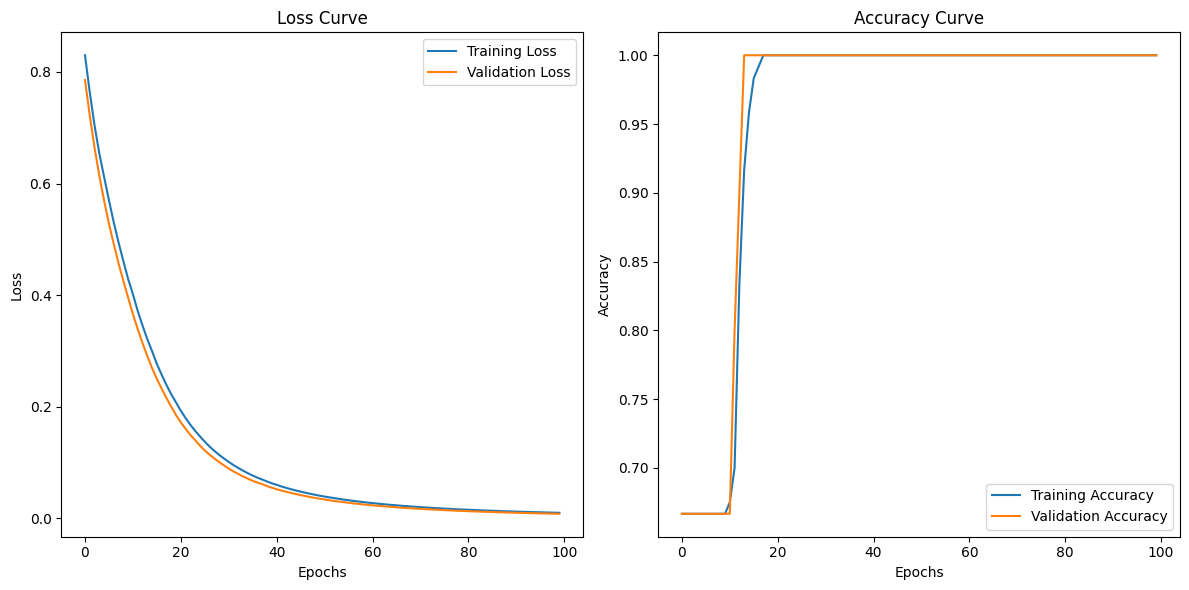

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load and prepare the data (Iris dataset for example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Convert labels to binary for simplicity (e.g., class 0 vs classes 1 and 2)
y = (y == 0).astype(int)  # Binary classification: Class 0 vs Class 1 or 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add a hidden layer with 10 neurons and ReLU activation
model.add(Dense(10, input_dim=4, activation='relu'))

# Add output layer with Sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Extract the history of loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.epoch, train_loss, label='Training Loss')
plt.plot(history.epoch, val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.epoch, train_acc, label='Training Accuracy')
plt.plot(history.epoch, val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Que.9)How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients!

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load and prepare the data (Iris dataset for example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Convert labels to binary for simplicity (e.g., class 0 vs classes 1 and 2)
y = (y == 0).astype(int)  # Binary classification: Class 0 vs Class 1 or 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add a hidden layer with 10 neurons and ReLU activation
model.add(Dense(10, input_dim=4, activation='relu'))

# Add output layer with Sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Define an Adam optimizer with gradient clipping
optimizer = Adam(clipvalue=1.0)  # Clip gradients to a value of 1.0

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7381 - loss: 0.6523 - val_accuracy: 0.6667 - val_loss: 0.6414
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6719 - loss: 0.6373 - val_accuracy: 0.6667 - val_loss: 0.6084
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5944 - val_accuracy: 0.6667 - val_loss: 0.5751
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6169 - loss: 0.5952 - val_accuracy: 0.6667 - val_loss: 0.5440
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6517 - loss: 0.5474 - val_accuracy: 0.6667 - val_loss: 0.5161
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6417 - loss: 0.5217 - val_accuracy: 0.6667 - val_loss: 0.4890
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6345 - loss: 0.5029 - val_accuracy: 0.6667 - val_loss: 0.4633
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6284 - loss: 0.4807 - val_accuracy: 0.6667 - 

Que.10))How can you create a custom loss function in Keras!


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Define a custom loss function (Mean Absolute Error + a custom penalty)
def custom_loss(y_true, y_pred):
    # Calculate mean absolute error
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Add a custom penalty (for example, penalizing large differences)
    penalty = tf.reduce_mean(tf.square(y_true - y_pred))

    # Return the sum of MAE and penalty
    return mae + 0.1 * penalty

# Load and prepare the data (Iris dataset for example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Convert labels to binary for simplicity (e.g., class 0 vs classes 1 and 2)
y = (y == 0).astype(int)  # Binary classification: Class 0 vs Class 1 or 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add a hidden layer with 10 neurons and ReLU activation
model.add(Dense(10, input_dim=4, activation='relu'))

# Add output layer with Sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with the custom loss function
model.compile(optimizer=Adam(), loss=custom_loss, metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3401 - loss: 0.7382 - val_accuracy: 0.3333 - val_loss: 0.7454
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4086 - loss: 0.6685 - val_accuracy: 0.3333 - val_loss: 0.7439
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2986 - loss: 0.7791 - val_accuracy: 0.3333 - val_loss: 0.7428
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3406 - loss: 0.7346 - val_accuracy: 0.3333 - val_loss: 0.7415
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2976 - loss: 0.7776 - val_accuracy: 0.3333 - val_loss: 0.7404
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3671 - loss: 0.7038 - val_accuracy: 0.3333 - val_loss: 0.7393
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3437 - loss: 0.7286 - val_accuracy: 0.3333 - val_loss: 0.7382
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3485 - loss: 0.7220 - val_accuracy: 0.3333 

Que.11) How can you visualize the structure of a neural network model in Keras?

Functional model structure has been saved to 'functional_model_structure.png'


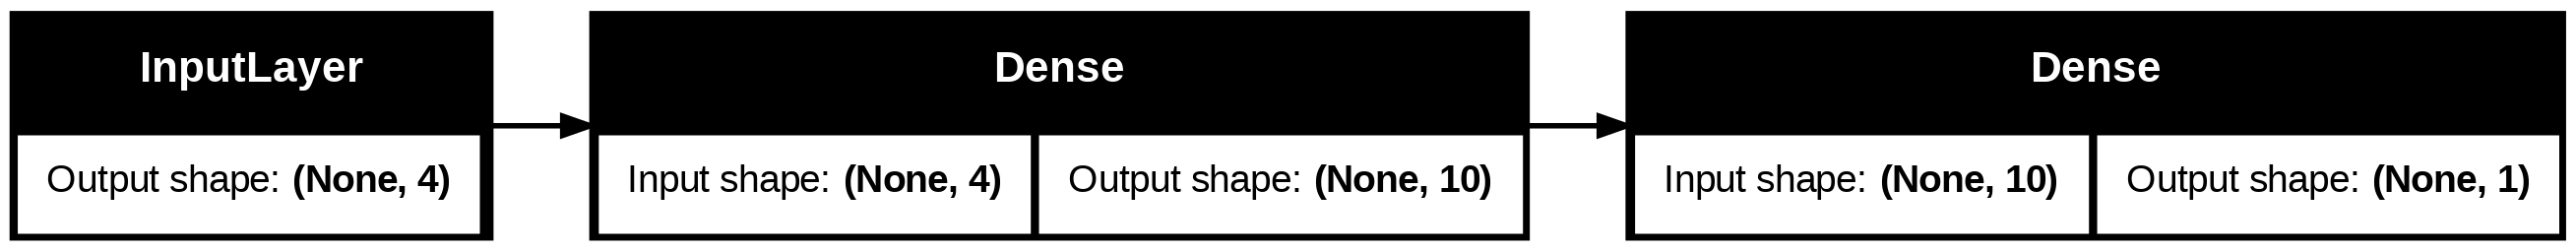

In [14]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model # Import plot_model

# Functional API Model Example
inputs = Input(shape=(4,))
x = Dense(10, activation='relu')(inputs)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Visualize the model structure
plot_model(model, to_file='functional_model_structure.png', show_shapes=True, show_layer_names=True)

print("Functional model structure has been saved to 'functional_model_structure.png'")
plot_model(model, to_file='model_structure.png', show_shapes=True, rankdir='LR')